# Intermediate Machine Learning by Scikit-Learn

## Liberaries Import

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [182]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [183]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Mapping

In [184]:
df["smoker_No"] = df["smoker"].map({'Yes': 1, 'No': 0})   

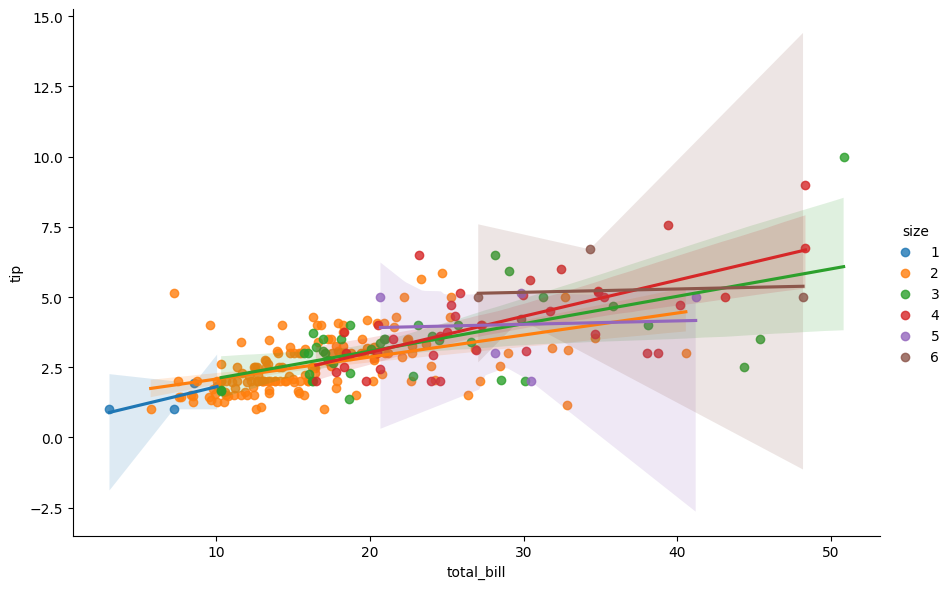

In [185]:
sns.lmplot(x='total_bill', y='tip', data=df, hue='size', height=6, aspect=1.5)

## Simples Linear Regression

Preidicted Tips: [3.04525623 1.86330727 3.55119456 3.69452593 2.31576375 2.83881627
 3.96728338 2.26014262 2.50615915 2.57033737 2.88160176 2.07723468
 2.06439904 2.47407003 2.00236009 2.91903905 2.92652651 3.23351235
 2.68478854 5.33107064 3.13831465 3.13403611 2.4558862  1.94673896
 3.16077703 2.17564129 2.02375283 3.62927807 2.68906708 6.07767732
 4.99734388 1.75313465 2.83025918 3.09552917 2.74040966 3.50092162
 2.21200895 5.53644096 2.33287794 3.35010279 2.04942412 2.47834858
 3.48701634 2.03017065 2.03124029 1.25361414 2.05798121 2.92438724
 1.73388118]
Mean Squared Error: 0.5688142529229538
R^2 Score: 0.5449381659234663


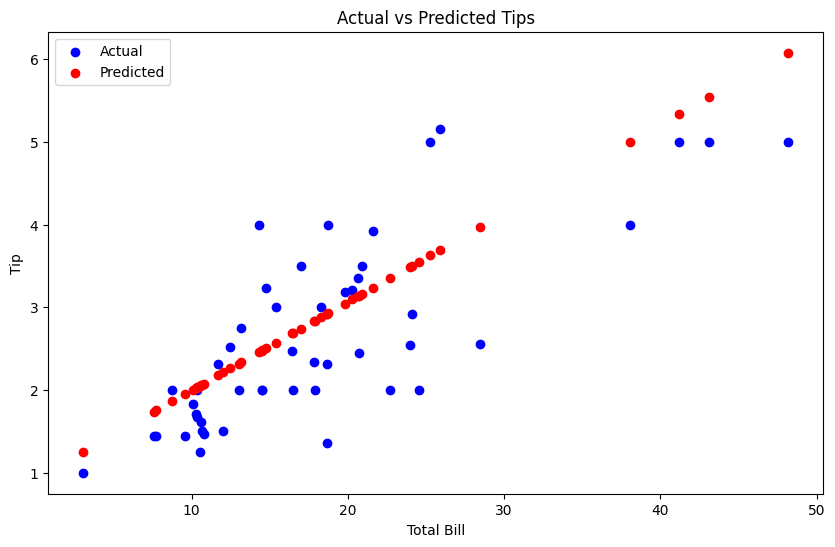

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = df[['total_bill']]
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
Predicted_Tips = model.predict(X_test)
print(f"Preidicted Tips: {Predicted_Tips}")
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Actual vs Predicted Tips')
plt.legend()
plt.show()
# Simples Linear Regression
# --- IGNORE ---

## Multiple/Multi Linear Regression

🔍 Best alpha: 10
📉 Mean Squared Error: 0.6802
📈 R^2 Score: 0.4559


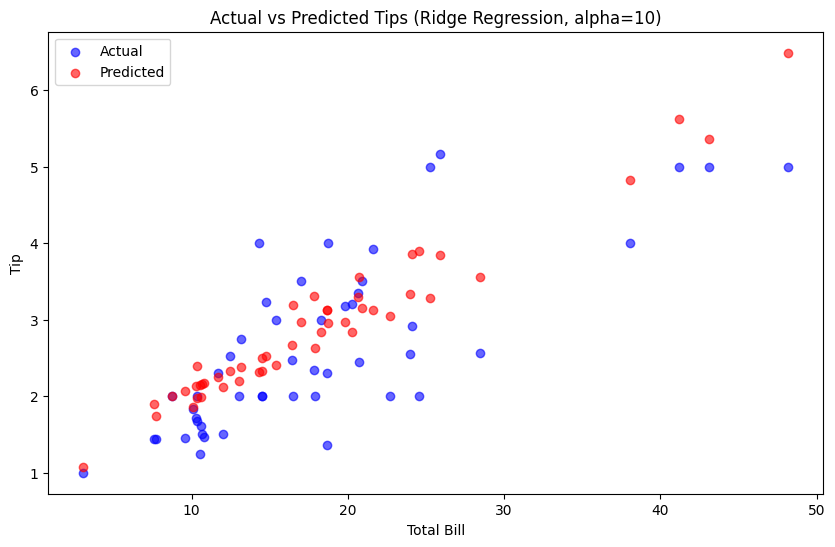

In [187]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# --- Data Preparation ---
# Assuming df is already loaded and cleaned
X = df[['total_bill', 'size', 'smoker_No']]  # Feature set
y = df['tip']                                # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Pipeline: Scaling + Ridge + GridSearch ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Hyperparameters to search
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100],
    'ridge__fit_intercept': [True, False],
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'ridge__max_iter': [None, 1000, 2000],
    'ridge__tol': [1e-4, 1e-3, 1e-2],
    'ridge__random_state': [42]
}

# GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)

# Best model after tuning
best_model = grid.best_estimator_
best_alpha = grid.best_params_['ridge__alpha']
print(f'🔍 Best alpha: {best_alpha}')

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'📉 Mean Squared Error: {mse:.4f}')
print(f'📈 R^2 Score: {r2:.4f}')

# --- Visualization ---
plt.figure(figsize=(10, 6))
plt.scatter(X_test['total_bill'], y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test['total_bill'], y_pred, color='red', label='Predicted', alpha=0.6)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title(f'Actual vs Predicted Tips (Ridge Regression, alpha={best_alpha})')
plt.legend()
plt.show()


## Logistic Regression

Accuracy: 1.0000
Confusion Matrix:
 [[31  0]
 [ 0 18]]
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00        31
         Yes       1.00      1.00      1.00        18

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



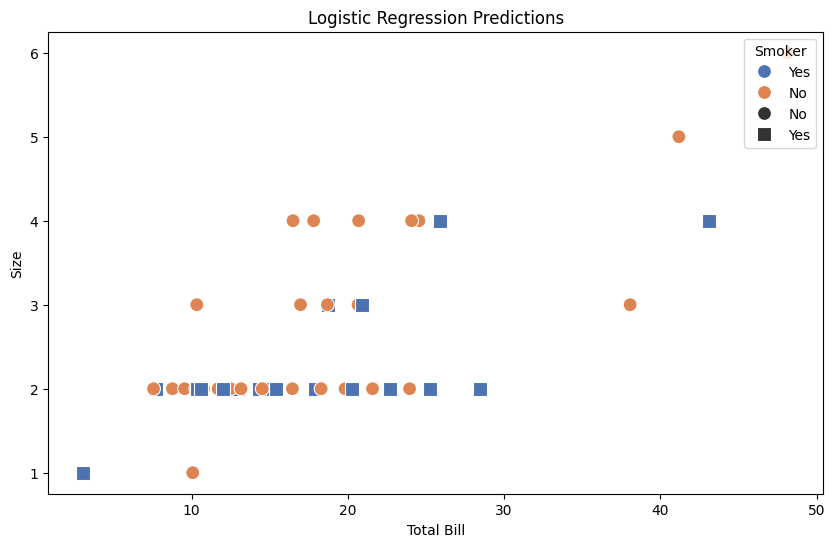

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare data
X = df[['total_bill', 'size', 'smoker_No']]
y = df['smoker']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['total_bill'], y=X_test['size'], hue=y_test, style=y_pred, palette='deep', markers=['o', 's'], s=100)
plt.title('Logistic Regression Predictions')
plt.xlabel('Total Bill')
plt.ylabel('Size')
plt.legend(title='Smoker', loc='upper right')
plt.show()